In [54]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from datetime import datetime
import dateparser
import os

#reading file, not standart delimetr, providing it(;) to pandas

df=pd.read_csv('../datasets/household_power_consumption.txt', delimiter=';')

#rewriting to read from excel
#df.to_csv('../temp/timeser.csv',encoding='utf-16', sep='\t', index=False)

/var/folders/l5/hh08yprn4dsbqwfsjk4kb6zr0000gn/T/ipykernel_45633/2948279893.py:11: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../datasets/household_power_consumption.txt', delimiter=';')


In [50]:
#df_compressing['Global_active_power']=df_compressing['Global_active_power'].apply(pd.to_numeric)
#df_compressing
#df=df.apply(pd.to_numeric, errors='ignore')
#df.dtypes




Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [51]:
#df=df.apply(pd.to_numeric, errors='coerce')
#df.dtypes

Date                     float64
Time                     float64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [60]:
df_compressing=df.copy(deep=True).drop(columns=['Sub_metering_1','Sub_metering_2','Sub_metering_3'])
df_compressing['Datetime']=df_compressing['Date'] + ' '+ df_compressing['Time']
#df_compressing['Datetime'] = datetime.strptime(df_compressing['Datetime'], '%d/%m/%y %H:%M:%S')

df_compressing=df_compressing.drop(columns=['Date', 'Time'])
df_compressing=df_compressing[['Datetime','Global_active_power','Global_reactive_power', 'Voltage','Global_intensity']]
df_compressing['Global_active_power']=df_compressing['Global_active_power'].apply(pd.to_numeric, errors='coerce')
df_compressing['Datetime']=df_compressing['Datetime'].apply(pd.to_datetime, errors='coerce')
df_compressing=df_compressing.set_index(df_compressing.columns[0])

df_compressing=df_compressing['Global_active_power']
df_compressing.describe()


#exec_time=5m 7sec


/var/folders/l5/hh08yprn4dsbqwfsjk4kb6zr0000gn/T/ipykernel_45633/3846096155.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_compressing['Datetime']=df_compressing['Datetime'].apply(pd.to_datetime, errors='coerce')


count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

In [63]:
df_compressing.to_csv('../temp/timeser_final.csv',encoding='utf-16', sep='\t')
df_compressing

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

In [73]:
df_graph=df_compressing.loc['2010-05-05 10:00:00':'2010-11-26 21:02:00']

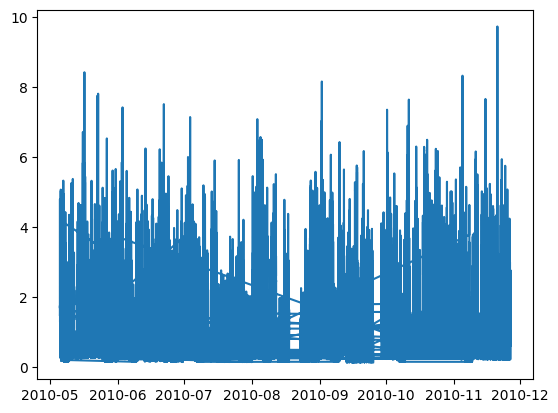

In [74]:
plt.plot(df_graph)